In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
from sklearn import preprocessing as pr

sx = pr.MinMaxScaler()
sy = pr.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis = 'columns')) 
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1)) 
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
np.ones(shape=(2))

array([1., 1.])

In [ ]:
#batch_gradient_descent

In [7]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    feature_number = X.shape[1]

    w = np.ones(shape=(feature_number))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_pre = np.dot(w, scaled_x.T) + b # w1 * area + w2 * bedroom + bias

        w_grad = -(2/total_samples)* (X.T.dot(y_true - y_pre))
        b_grad = -(2/total_samples)* np.sum(y_true - y_pre)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_pre))

        if i% 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b, cost , cost_list, epoch_list

w,b, cost , cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

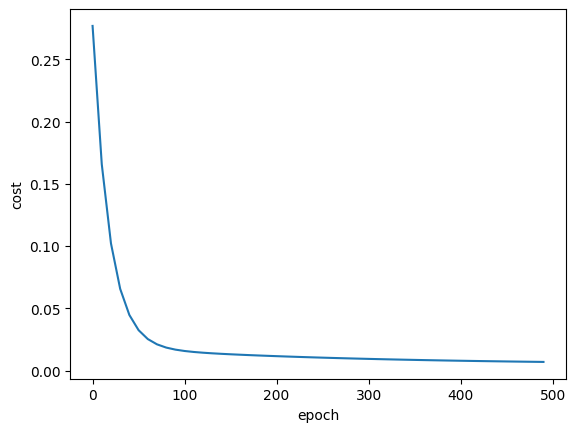

In [10]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [8]:
def predict(area, bedroom, w,b):
    scaled_x = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]* scaled_x[0] + w[1] * scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [9]:
predict(1000,2,w,b)

C:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [10]:
predict(1500,3,w,b)

C:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [ ]:
#Stochastic_gradient_descent

In [11]:
import random
random.randint(0,6)

3

In [12]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    feature_number = X.shape[1]

    w = np.ones(shape=(feature_number))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, total_samples -1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_pre = np.dot(w, sample_x.T) + b # w1 * area + w2 * bedroom + bias

        w_grad = -(2/total_samples)* (sample_x.T.dot(sample_y - y_pre))
        b_grad = -(2/total_samples)* np.sum(sample_y - y_pre)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y - y_pre)

        if i% 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b, cost , cost_list, epoch_list

w_sgd,b_sgd, cost_sgd , cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd, cost_sgd

(array([0.70840804, 0.67491047]), -0.2318141928653888, 0.0026361101793268794)

In [13]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

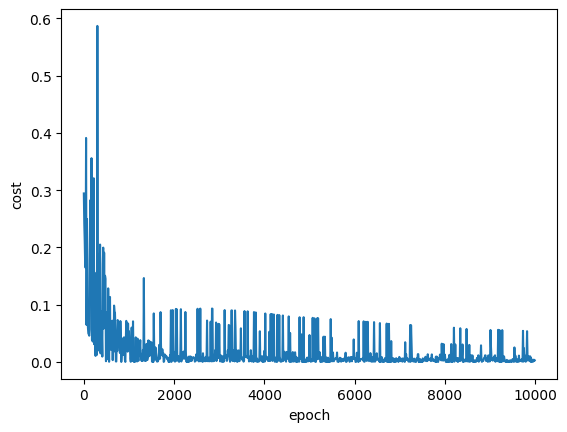

In [14]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [15]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.39947716414443

In [19]:
import numpy as np

def mini_batch_gradient_descent(X, y_true, epochs, batch_size, learning_rate=0.01):

    feature_number = X.shape[1]
    total_samples = X.shape[0]
    #print(total_samples)
    w = np.ones(shape=(feature_number))
    b = 0
    cost_list = []
    epoch_list = []
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    
    for epoch in range(epochs):
        # Shuffle the data to randomize mini-batches in each epoch
        indices = np.random.permutation(total_samples)
        X_shuffled = X[indices]
        y_shuffled = y_true[indices]

        for i in range(0, total_samples, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Forward pass
            y_pred = np.dot(X_batch, w) + b

            # Compute gradients
            w_grad = -(2/len(X_batch)) * (X_batch.T.dot(y_batch - y_pred))
            b_grad = -(2/len(X_batch)) * np.sum(y_batch - y_pred)

            # Update parameters
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad

        # Compute cost for the epoch
        y_pred = np.dot(X, w) + b
        cost = np.mean(np.square(y_true - y_pred))

        # Store cost and epoch for visualization
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)

    return w, b, cost, cost_list, epoch_list

# Assuming you have scaled_x and scaled_y defined somewhere
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 300, batch_size=8)
print("Weights:", w_mbgd)
print("Bias:", b_mbgd)
print("Final Cost:", cost_mbgd)


Weights: [0.66803852 0.61648451]
Bias: -0.18343564576667704
Final Cost: 0.0050377718570335525


In [20]:
predict(2600,4,w_mbgd,b_mbgd)

C:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


125.63226514195856

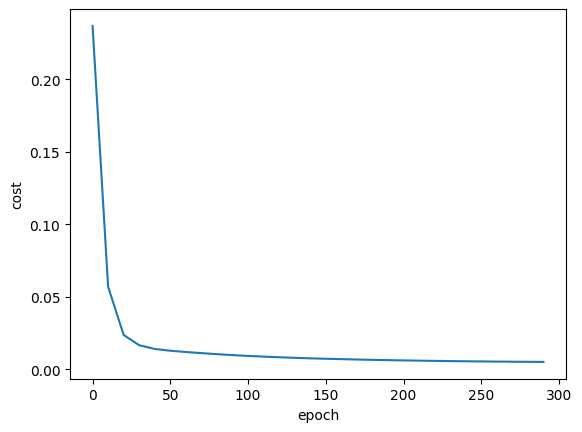

In [21]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mbgd,cost_list_mbgd)